<a href="https://colab.research.google.com/github/ghatwar/Sensex-Prediction/blob/main/Sensex_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os    
!pip install pandas-datareader
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

In [ ]:
# Installing yahoo finance
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 6.9 MB/s 
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Pulling sensex data
import yfinance as yf

df = yf.download('^BSESN', start='2001-01-02', end='2020-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [ ]:
# Check if df is a dataframe
isinstance(df, pd.DataFrame)

True

In [ ]:
# Creating price difference column
df['Price_diff'] = df['Close'] - df['Open']
df['Price_diff']

Date
2001-01-02     65.659912
2001-01-03     82.439941
2001-01-04    -65.600098
2001-01-05     67.390137
2001-01-08    -44.329590
                 ...    
2020-12-23    371.878906
2020-12-24    230.050781
2020-12-28    200.160156
2020-12-29    146.457031
2020-12-30    -42.812500
Name: Price_diff, Length: 4926, dtype: float64

In [ ]:
# Column and value with max price difference 
df['Price_diff'].max()

2889.349609375

In [ ]:
# Column and value with min price difference 
df['Price_diff'].min()

-2099.330078125

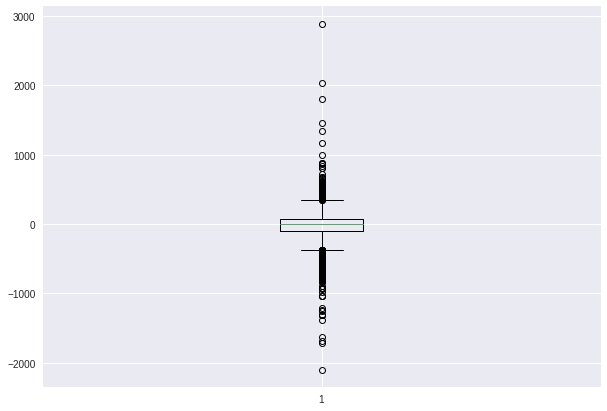

Text(0, 0.5, 'Price Range')

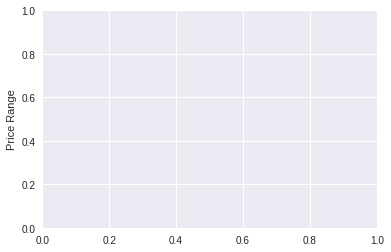

In [ ]:
# Boxplot distribution of price difference
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['Price_diff'])
 
# Show plot
plt.show()
plt.ylabel("Price Range")

In [ ]:
# Create a column for movement of price movement
df['Price_Movement'] = np.where(df['Price_diff'] >= 0, 1, 0)
# Display the dataframe
print(df)

                    Open          High           Low         Close  \
Date                                                                 
2001-01-02   3953.219971   4028.570068   3929.370117   4018.879883   
2001-01-03   3977.580078   4067.659912   3977.580078   4060.020020   
2001-01-04   4180.970215   4180.970215   4109.549805   4115.370117   
2001-01-05   4116.339844   4195.009766   4115.350098   4183.729980   
2001-01-08   4164.759766   4206.720215   4101.529785   4120.430176   
...                  ...           ...           ...           ...   
2020-12-23  46072.300781  46513.320312  45899.101562  46444.179688   
2020-12-24  46743.488281  47053.398438  46539.019531  46973.539062   
2020-12-28  47153.589844  47406.718750  47148.238281  47353.750000   
2020-12-29  47466.621094  47714.550781  47361.898438  47613.078125   
2020-12-30  47789.031250  47807.851562  47358.359375  47746.218750   

               Adj Close  Volume  Price_diff  Price_Movement  
Date                      

In [ ]:
# Resting index for price movement
df_Price_Movement = df[["Price_Movement"]]
df_Price_Movement.reset_index(level=0, inplace=True)
df_Price_Movement

,Date,Price_Movement
0,2001-01-02,1
1,2001-01-03,1
2,2001-01-04,0
3,2001-01-05,1
4,2001-01-08,0
...,...,...
4921,2020-12-23,1
4922,2020-12-24,1
4923,2020-12-28,1
4924,2020-12-29,1


Text(0, 0.5, 'Sensex Price')

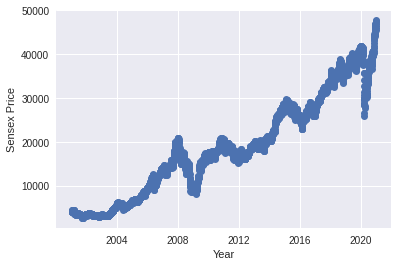

In [ ]:
# Timeseries 
plt.plot_date(df.index,df.Close)
plt.xlabel("Year")
plt.ylabel("Sensex Price")

In [ ]:
!pwd
!ls

/content
sample_data


In [ ]:
# Importing files
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
link = 'https://drive.google.com/file/d/19JUw9f3M8oKvKwFBsT4-4Jtelm1gvLGJ/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('india-news-headlines.csv')

df_news = pd.read_csv('india-news-headlines.csv')
df_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
# Check if df is a dataframe
isinstance(df_news, pd.DataFrame)

True

In [ ]:
# Formatting date column
df_news['publish_date'] = pd.to_datetime(df_news['publish_date'], format='%Y%m%d')

# Displaying date column
df_news['publish_date']

0         2001-01-02
1         2001-01-02
2         2001-01-02
3         2001-01-02
4         2001-01-02
             ...    
3424062   2020-12-31
3424063   2020-12-31
3424064   2020-12-31
3424065   2020-12-31
3424066   2020-12-31
Name: publish_date, Length: 3424067, dtype: datetime64[ns]

In [ ]:
# Merging headlines data and price data
df_price_news = pd.merge(df_Price_Movement, df_news, left_on = 'Date', right_on = 'publish_date')
df_price_news

,Date,Price_Movement,publish_date,headline_category,headline_text
0,2001-01-02,1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,1,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,1,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,1,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...,...,...
2334270,2020-12-30,0,2020-12-30,city.nagpur,Robot-assisted knee replacement is precise; pe...
2334271,2020-12-30,0,2020-12-30,city.nagpur,Flourishing youth: Nirman develops unique asse...
2334272,2020-12-30,0,2020-12-30,city.nagpur,MERC's new supply code is anti-consumer: Hogade
2334273,2020-12-30,0,2020-12-30,city.nagpur,66th ABVP national meet witnesses participatio...


In [ ]:
# Filtering for rows from headline category

# df_price_news = df_price_news[df_price_news["headline_category"].str.contains("entertainment|sports|astrology|life-style|cricket|movie|jugular-vein|home.sunday-times.deep-focus|unknown|removed|food-facts|recipes") == False]
# df_price_news = df_price_news[df_price_news["headline_category"].str.contains("budget|result|business|ambani|election|dussehra|diwali|republic-day|economic-survey|assembly|swine-flu-outbreak-in-india|mumbai|bombay|delhi|chandigarh|hyderabad|bengaluru|bangalore|lucknow|ahmedabad|pune|kolkatta|calcutta|nagpur|goa|chennai|gurgaon|noida|madras")]
df_price_news = df_price_news[df_price_news["headline_category"].str.contains("budget|result|business|ambani|election|republic-day|economic-survey|assembly|swine-flu-outbreak-in-india")]

# Display
df_price_news

,Date,Price_Movement,publish_date,headline_category,headline_text
275,2001-01-04,0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling
3405,2001-05-22,0,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...
3473,2001-05-22,0,2001-05-22,business.india-business,Samsung says hello to cellular unit in India
3480,2001-05-22,0,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports
3493,2001-05-22,0,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr
...,...,...,...,...,...
2334034,2020-12-30,0,2020-12-30,business.india-business,Will use supervision tech to keep up with enti...
2334139,2020-12-30,0,2020-12-30,business.india-business,Banks need Rs 1 lakh crore for NPAs; growth
2334141,2020-12-30,0,2020-12-30,business.india-business,AirAsia to sell 33% in local JV to partner Tata
2334156,2020-12-30,0,2020-12-30,business.india-business,Drop 'culture-fit' hiring to get fresh perspec...


In [ ]:
# Get the unique values of headline category column
df_price_news.headline_category.unique()

array(['business.india-business', 'business.international-business',
       'business', 'ambani', 'business.personal-finance', 'election-2008',
       'matches-results', 'complete-results-2009', 'schedule-results',
       'assembly-elections-2011.kerala', 'pre-budget-2011',
       'union-budget-2011', 'rail-budget-2011', 'economic-survey-2011',
       'assembly-elections-2011.assam',
       'assembly-elections-2011.west-bengal',
       'assembly-elections-2011.tamil-nadu',
       'assembly-elections-2011.puducherry',
       'assembly-elections-2011.assembly-elections-results',
       'rail-budget', 'assembly-elections-2012.manipur',
       'assembly-elections-2012.uttar-pradesh',
       'assembly-elections-2012.goa', 'assembly-elections-2012.punjab',
       'assembly-elections-2012.uttarakhand', 'republic-day',
       'economic-survey', 'union-budget', 'pre-budget',
       'gujarat-assembly-elections',
       'himachal-pradesh-assembly-elections',
       'assembly-elections-2013.chhatt

In [ ]:
# Get number of unique values in column 'headline_category'
df_price_news.headline_category.nunique(dropna = True)

119

In [ ]:
# Intalling pytorch
!pip3 install torch torchvision torchaudio
!pip3 install Cython

In [ ]:
# Verification of pytorch instalation
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9637, 0.0579, 0.2370],
        [0.5605, 0.4759, 0.9120],
        [0.2758, 0.7887, 0.0810],
        [0.4729, 0.2060, 0.4543],
        [0.8010, 0.3254, 0.5087]])


In [ ]:
# Installing transformers
!pip install transformers[torch]

     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 62.6 MB/s 
     |████████████████████████████████| 6.6 MB 50.2 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Install datasets
!pip install datasets
from datasets import Dataset
from datasets import load_dataset


     |████████████████████████████████| 342 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 61.4 MB/s 
     |████████████████████████████████| 212 kB 69.3 MB/s 
     |████████████████████████████████| 136 kB 65.5 MB/s 
     |████████████████████████████████| 138 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 63.8 MB/s 
     |████████████████████████████████| 144 kB 68.6 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
dataset = Dataset.from_pandas(df_price_news)

In [ ]:
dataset.info

DatasetInfo(description='', citation='', homepage='', license='', features={'Date': Value(dtype='timestamp[ns]', id=None), 'Price_Movement': Value(dtype='int64', id=None), 'publish_date': Value(dtype='timestamp[ns]', id=None), 'headline_category': Value(dtype='string', id=None), 'headline_text': Value(dtype='string', id=None), '__index_level_0__': Value(dtype='int64', id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [ ]:
dataset['headline_text'][:10]

['Car dealers caught in Bihar sales tax ruling',
 "Re-negotiation best: Deshmukh; lenders' SOS to Centre",
 'Samsung says hello to cellular unit in India',
 'Govt lifts port-linked curbs on imports',
 'RIL plans to mop up to Rs 1;000cr',
 'Eicher crashes into the red; to cut 200 jobs',
 'Indo Rama posts Rs18cr net',
 'Jet; Sahara to wait & watch',
 'Auto body drives in new classification norms',
 "Are US 64's sunny days over?"]

In [ ]:
dataset.features

{'Date': Value(dtype='timestamp[ns]', id=None),
 'Price_Movement': Value(dtype='int64', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'headline_category': Value(dtype='string', id=None),
 'headline_text': Value(dtype='string', id=None),
 'publish_date': Value(dtype='timestamp[ns]', id=None)}

In [ ]:
# Splitting dataset into test and train
dataset = dataset.train_test_split(test_size=0.2, shuffle=False)

In [ ]:
# Creating train dataset
train_dataset = dataset["train"]
train_dataset[0]

{'Date': Timestamp('2001-01-04 00:00:00'),
 'Price_Movement': 0,
 '__index_level_0__': 275,
 'headline_category': 'business.india-business',
 'headline_text': 'Car dealers caught in Bihar sales tax ruling',
 'publish_date': Timestamp('2001-01-04 00:00:00')}

In [ ]:
# Creating test dataset
test_dataset = dataset["test"]
test_dataset[0]

{'Date': Timestamp('2017-09-13 00:00:00'),
 'Price_Movement': 0,
 '__index_level_0__': 1866820,
 'headline_category': 'business.international-business',
 'headline_text': 'U.S. oils and fats - Sept. 12',
 'publish_date': Timestamp('2017-09-13 00:00:00')}

In [ ]:
# Creating validation set from train set
val_dataset = train_dataset.train_test_split(test_size=0.2, shuffle=False)
val_dataset['train'][0]

{'Date': Timestamp('2001-01-04 00:00:00'),
 'Price_Movement': 0,
 '__index_level_0__': 275,
 'headline_category': 'business.india-business',
 'headline_text': 'Car dealers caught in Bihar sales tax ruling',
 'publish_date': Timestamp('2001-01-04 00:00:00')}

In [ ]:
# Assigning train dataset
train_dataset = val_dataset['train']
train_dataset[0]

{'Date': Timestamp('2001-01-04 00:00:00'),
 'Price_Movement': 0,
 '__index_level_0__': 275,
 'headline_category': 'business.india-business',
 'headline_text': 'Car dealers caught in Bihar sales tax ruling',
 'publish_date': Timestamp('2001-01-04 00:00:00')}

In [ ]:
# Assigning Validation dataset
val_dataset = val_dataset['test']
val_dataset[0]

{'Date': Timestamp('2017-02-21 00:00:00'),
 'Price_Movement': 1,
 '__index_level_0__': 1770635,
 'headline_category': 'business.international-business',
 'headline_text': 'CARE ratings for Indian debt instruments-Feb 21',
 'publish_date': Timestamp('2017-02-21 00:00:00')}

In [ ]:
train_dataset.shape

(83659, 6)

In [ ]:
val_dataset.shape

(20915, 6)

In [ ]:
test_dataset.shape

(26144, 6)

In [ ]:
# Applying model - ProsusAI/finbert (https://huggingface.co/ProsusAI/finbert)

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "ProsusAI/finbert"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Sentiment_assessment = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)(train_dataset['headline_text'][:10000])
Sentiment_assessment

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'negative', 'score': 0.9183387756347656},
 {'label': 'neutral', 'score': 0.8187951445579529},
 {'label': 'neutral', 'score': 0.8468857407569885},
 {'label': 'positive', 'score': 0.7317630648612976},
 {'label': 'neutral', 'score': 0.8738642930984497},
 {'label': 'negative', 'score': 0.9306547045707703},
 {'label': 'neutral', 'score': 0.8959463834762573},
 {'label': 'neutral', 'score': 0.9458876252174377},
 {'label': 'neutral', 'score': 0.9375859498977661},
 {'label': 'neutral', 'score': 0.777438223361969},
 {'label': 'neutral', 'score': 0.9216713309288025},
 {'label': 'neutral', 'score': 0.8265298008918762},
 {'label': 'negative', 'score': 0.8617813587188721},
 {'label': 'negative', 'score': 0.9531933069229126},
 {'label': 'neutral', 'score': 0.7549012899398804},
 {'label': 'neutral', 'score': 0.9125521183013916},
 {'label': 'neutral', 'score': 0.9378082752227783},
 {'label': 'negative', 'score': 0.93931645154953},
 {'label': 'negative', 'score': 0.8669367432594299},
 {'label

In [ ]:
# Converting into json
import json

# Converts input dictionary into string and stores it in json_string
json_string = json.dumps(Sentiment_assessment)
# print('Equivalent json string of input dictionary:',
# 	json_string)
# print("	 ")

# Checking type of object returned by json.dumps
print(type(json_string))

<class 'str'>


In [ ]:
# Splitting json column
for c in json_string:
    split = c.split(",")
    json_string.split(',')
# print(json_string.split(','))

In [ ]:
# Creating column for label
label=[]
for i in Sentiment_assessment:
   label.append(i['label'])

In [ ]:
# Train_dataset of 10000 records
train_dataset_10000= train_dataset[:10000]
train_dataset_10000

{'Date': [Timestamp('2001-01-04 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05

In [ ]:
# Adding label
train_dataset_10000['label'] = label
train_dataset_10000

{'Date': [Timestamp('2001-01-04 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'labels'.
train_dataset_10000['label'] = label_encoder.fit_transform(train_dataset_10000['label'])
train_dataset_10000['label'] 

array([0, 1, 1, ..., 1, 2, 1])

In [ ]:
train_dataset_10000

{'Date': [Timestamp('2001-01-04 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-22 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-28 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05-29 00:00:00'),
  Timestamp('2001-05

In [ ]:
# Converting dataset sample to dataframe
train_dataset_10000 = pd.DataFrame.from_dict(train_dataset_10000)
train_dataset_10000

,Date,Price_Movement,publish_date,headline_category,headline_text,__index_level_0__,label
0,2001-01-04,0,2001-01-04,business.india-business,Car dealers caught in Bihar sales tax ruling,275,0
1,2001-05-22,0,2001-05-22,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,3405,1
2,2001-05-22,0,2001-05-22,business.india-business,Samsung says hello to cellular unit in India,3473,1
3,2001-05-22,0,2001-05-22,business.india-business,Govt lifts port-linked curbs on imports,3480,2
4,2001-05-22,0,2001-05-22,business.india-business,RIL plans to mop up to Rs 1;000cr,3493,1
...,...,...,...,...,...,...,...
9995,2003-09-29,1,2003-09-29,business.india-business,ONGC to buy 2 Cairn gas fields,174327,1
9996,2003-09-29,1,2003-09-29,business.india-business,IOC eyes Bangladesh; Indonesia for business,174328,1
9997,2003-09-29,1,2003-09-29,business.india-business,Jaitley clears 15 foreign tech collaborations,174330,1
9998,2003-09-29,1,2003-09-29,business.india-business,World Bank grants $54 mn loan to India,174332,2


In [ ]:
# Groupby Date
train_dataset_10000=train_dataset_10000.groupby('Date').mean()
train_dataset_10000

,Price_Movement,__index_level_0__,label
Date,,,
2001-01-04,0.0,275.000000,0.000000
2001-05-22,0.0,3485.714286,1.000000
2001-05-28,1.0,3613.888889,0.777778
2001-05-29,1.0,3867.000000,0.700000
2001-05-30,0.0,4179.750000,0.375000
...,...,...,...
2003-09-23,1.0,173386.130435,1.043478
2003-09-24,1.0,173684.923077,1.076923
2003-09-25,0.0,173933.437500,1.187500


In [ ]:
# Drop column index level
train_dataset_10000 = train_dataset_10000.drop(columns=['__index_level_0__'])
train_dataset_10000

,Price_Movement,label
Date,,
2001-01-04,0.0,0.000000
2001-05-22,0.0,1.000000
2001-05-28,1.0,0.777778
2001-05-29,1.0,0.700000
2001-05-30,0.0,0.375000
...,...,...
2003-09-23,1.0,1.043478
2003-09-24,1.0,1.076923
2003-09-25,0.0,1.187500


In [ ]:
# Creating sentiment column
train_dataset_10000['Sentiment'] = [1 if x >= 0.5 else 0 for x in train_dataset_10000['label']]
train_dataset_10000

,Price_Movement,label,Sentiment
Date,,,
2001-01-04,0.0,0.000000,0
2001-05-22,0.0,1.000000,1
2001-05-28,1.0,0.777778,1
2001-05-29,1.0,0.700000,1
2001-05-30,0.0,0.375000,0
...,...,...,...
2003-09-23,1.0,1.043478,1
2003-09-24,1.0,1.076923,1
2003-09-25,0.0,1.187500,1


In [ ]:
# Dropping label column
train_dataset_10000 = train_dataset_10000.drop(columns=['label'])
train_dataset_10000

,Price_Movement,Sentiment
Date,,
2001-01-04,0.0,0
2001-05-22,0.0,1
2001-05-28,1.0,1
2001-05-29,1.0,1
2001-05-30,0.0,0
...,...,...
2003-09-23,1.0,1
2003-09-24,1.0,1
2003-09-25,0.0,1


In [ ]:
# Determining true and false matches
comparison_column = np.where(train_dataset_10000["Price_Movement"] == train_dataset_10000["Sentiment"], True, False)
print(comparison_column)

train_dataset_10000["equal"] = comparison_column
print(train_dataset_10000)

# Counting total true and false matches
train_dataset_10000["equal"].value_counts()

# dataset_analysis_2["equal"].values.sum()
# (~dataset_analysis_2["equal"]).values.sum()


[ True False  True  True  True False False False  True False  True  True
 False  True  True False False  True False False False False  True False
 False False  True  True False  True  True  True False False  True  True
 False  True  True False False  True  True  True False False  True False
 False False  True False False  True False False  True False False False
  True  True False False  True False  True  True  True False False  True
  True False  True  True  True False  True  True  True False  True False
  True False False False False  True  True False False  True False  True
  True  True False  True  True  True False  True  True False  True False
  True  True False  True  True False  True False False False False False
 False False  True False  True False False  True  True  True  True  True
  True  True False False False  True False False  True False  True False
  True False False False False False  True False False False  True False
  True  True False  True  True  True  True False Fa

False    288
True     276
Name: equal, dtype: int64

In [ ]:
# Correlation between sentiment and price movement
train_dataset_10000.corr()

,Price_Movement,Sentiment,equal
Price_Movement,1.000000,0.039876,0.985832
Sentiment,0.039876,1.000000,-0.044066
equal,0.985832,-0.044066,1.000000


In [ ]:
# Applying model - ProsusAI/finbert (https://huggingface.co/ProsusAI/finbert)

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "ProsusAI/finbert"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Sentiment_assessment = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)(val_dataset['headline_text'][:10000])
Sentiment_assessment

[{'label': 'neutral', 'score': 0.9177236557006836},
 {'label': 'negative', 'score': 0.9296143054962158},
 {'label': 'neutral', 'score': 0.8117622137069702},
 {'label': 'negative', 'score': 0.9384387135505676},
 {'label': 'neutral', 'score': 0.925198495388031},
 {'label': 'negative', 'score': 0.4364437162876129},
 {'label': 'negative', 'score': 0.8974472284317017},
 {'label': 'neutral', 'score': 0.9116373658180237},
 {'label': 'neutral', 'score': 0.8325499892234802},
 {'label': 'neutral', 'score': 0.9093242287635803},
 {'label': 'negative', 'score': 0.5777087807655334},
 {'label': 'neutral', 'score': 0.8123902082443237},
 {'label': 'neutral', 'score': 0.8690900802612305},
 {'label': 'neutral', 'score': 0.8264266848564148},
 {'label': 'neutral', 'score': 0.8542221188545227},
 {'label': 'neutral', 'score': 0.9370627403259277},
 {'label': 'neutral', 'score': 0.9290987849235535},
 {'label': 'negative', 'score': 0.7742723822593689},
 {'label': 'positive', 'score': 0.6995159387588501},
 {'lab

In [ ]:
# Converting into json
import json

# Converts input dictionary into string and stores it in json_string
json_string = json.dumps(Sentiment_assessment)
# print('Equivalent json string of input dictionary:',
# 	json_string)
# print("	 ")

# Checking type of object returned by json.dumps
print(type(json_string))

<class 'str'>


In [ ]:
# Splitting json column
for c in json_string:
    split = c.split(",")
    json_string.split(',')
# print(json_string.split(','))

In [ ]:
# Creating column for label
label=[]
for i in Sentiment_assessment:
   label.append(i['label'])

In [ ]:
# Val_dataset of 10000 records
val_dataset_10000= val_dataset[:10000]
val_dataset_10000

{'Date': [Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02

In [ ]:
# Adding label
val_dataset_10000['label'] = label
val_dataset_10000

{'Date': [Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-21 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02-22 00:00:00'),
  Timestamp('2017-02

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'labels'.
val_dataset_10000['label'] = label_encoder.fit_transform(val_dataset_10000['label'])
val_dataset_10000['label'] 

array([1, 0, 1, ..., 2, 1, 1])

In [ ]:
# Converting dataset sample to dataframe
val_dataset_10000 = pd.DataFrame.from_dict(val_dataset_10000)
val_dataset_10000

,Date,Price_Movement,publish_date,headline_category,headline_text,__index_level_0__,label
0,2017-02-21,1,2017-02-21,business.international-business,CARE ratings for Indian debt instruments-Feb 21,1770635,1
1,2017-02-21,1,2017-02-21,business.international-business,SE Asia Stocks-Sluggish on lack of global cues...,1770638,0
2,2017-02-21,1,2017-02-21,business.india-business,India's oldest PE; ChrysCapital just raised $6...,1770642,1
3,2017-02-21,1,2017-02-21,business.international-business,MIDEAST STOCKS-Gulf may have weak tone; Dubai ...,1770644,0
4,2017-02-21,1,2017-02-21,business.international-business,South African Markets - Factors to watch on Fe...,1770645,1
...,...,...,...,...,...,...,...
9995,2017-06-02,1,2017-06-02,business.international-business,Cowen to end mid-point matching in Millennium ...,1817902,2
9996,2017-06-02,1,2017-06-02,business.international-business,Central African Republic's economy to grow 4.7...,1817903,2
9997,2017-06-02,1,2017-06-02,business.international-business,Wall St rises as data points to accelerating e...,1817904,2
9998,2017-06-02,1,2017-06-02,business.international-business,Trump says he is closely monitoring 'terrorist...,1817905,1


In [ ]:
# Groupby Date
val_dataset_10000=val_dataset_10000.groupby('Date').mean()
val_dataset_10000

,Price_Movement,__index_level_0__,label
Date,,,
2017-02-21,1.0,1.770651e+06,0.583333
2017-02-22,1.0,1.771116e+06,1.021277
2017-02-23,0.0,1.771819e+06,0.911602
2017-02-27,0.0,1.772532e+06,1.077778
2017-02-28,0.0,1.773177e+06,1.025641
...,...,...,...
2017-05-29,1.0,1.815222e+06,0.867347
2017-05-30,1.0,1.815919e+06,0.940171
2017-05-31,0.0,1.816589e+06,0.881119


In [ ]:
# Drop column index level
val_dataset_10000 = val_dataset_10000.drop(columns=['__index_level_0__'])
val_dataset_10000

,Price_Movement,label
Date,,
2017-02-21,1.0,0.583333
2017-02-22,1.0,1.021277
2017-02-23,0.0,0.911602
2017-02-27,0.0,1.077778
2017-02-28,0.0,1.025641
...,...,...
2017-05-29,1.0,0.867347
2017-05-30,1.0,0.940171
2017-05-31,0.0,0.881119


In [ ]:
# Creating sentiment column
val_dataset_10000['Sentiment'] = [1 if x >= 0.5 else 0 for x in val_dataset_10000['label']]
val_dataset_10000

,Price_Movement,label,Sentiment
Date,,,
2017-02-21,1.0,0.583333,1
2017-02-22,1.0,1.021277,1
2017-02-23,0.0,0.911602,1
2017-02-27,0.0,1.077778,1
2017-02-28,0.0,1.025641,1
...,...,...,...
2017-05-29,1.0,0.867347,1
2017-05-30,1.0,0.940171,1
2017-05-31,0.0,0.881119,1


In [ ]:
# Dropping label column
val_dataset_10000 = val_dataset_10000.drop(columns=['label'])
val_dataset_10000

,Price_Movement,Sentiment
Date,,
2017-02-21,1.0,1
2017-02-22,1.0,1
2017-02-23,0.0,1
2017-02-27,0.0,1
2017-02-28,0.0,1
...,...,...
2017-05-29,1.0,1
2017-05-30,1.0,1
2017-05-31,0.0,1


In [ ]:
# Determining true and false matches
comparison_column = np.where(val_dataset_10000["Price_Movement"] == val_dataset_10000["Sentiment"], True, False)
print(comparison_column)

val_dataset_10000["equal"] = comparison_column
print(val_dataset_10000)

# Counting total true and false matches
val_dataset_10000["equal"].value_counts()

# dataset_analysis_2["equal"].values.sum()
# (~dataset_analysis_2["equal"]).values.sum()


[ True  True False False False  True False  True  True False False  True
 False  True False  True False False False False  True  True False  True
  True  True False  True False False False False  True False False False
 False False  True False  True  True  True False False False False  True
 False  True False  True False False  True  True  True False False False
 False False  True  True  True  True False  True  True]
            Price_Movement  Sentiment  equal
Date                                        
2017-02-21             1.0          1   True
2017-02-22             1.0          1   True
2017-02-23             0.0          1  False
2017-02-27             0.0          1  False
2017-02-28             0.0          1  False
...                    ...        ...    ...
2017-05-29             1.0          1   True
2017-05-30             1.0          1   True
2017-05-31             0.0          1  False
2017-06-01             1.0          1   True
2017-06-02             1.0          1  

False    38
True     31
Name: equal, dtype: int64

In [ ]:
# Correlation between sentiment and price movement
val_dataset_10000.corr()

,Price_Movement,Sentiment,equal
Price_Movement,1.0,NaN,1.0
Sentiment,NaN,NaN,NaN
equal,1.0,NaN,1.0


In [ ]:
# Applying model - ProsusAI/finbert (https://huggingface.co/ProsusAI/finbert)

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "ProsusAI/finbert"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Sentiment_assessment = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)(test_dataset['headline_text'][:10000])
Sentiment_assessment

[{'label': 'neutral', 'score': 0.9354398250579834},
 {'label': 'negative', 'score': 0.9273257255554199},
 {'label': 'neutral', 'score': 0.7949094772338867},
 {'label': 'neutral', 'score': 0.9358475208282471},
 {'label': 'negative', 'score': 0.9597023129463196},
 {'label': 'neutral', 'score': 0.6742509603500366},
 {'label': 'negative', 'score': 0.9011552333831787},
 {'label': 'neutral', 'score': 0.8270871043205261},
 {'label': 'positive', 'score': 0.5451710224151611},
 {'label': 'positive', 'score': 0.8816328644752502},
 {'label': 'neutral', 'score': 0.837408721446991},
 {'label': 'negative', 'score': 0.45276933908462524},
 {'label': 'positive', 'score': 0.5451710224151611},
 {'label': 'neutral', 'score': 0.9425953030586243},
 {'label': 'negative', 'score': 0.939190685749054},
 {'label': 'negative', 'score': 0.6906402707099915},
 {'label': 'positive', 'score': 0.5608506202697754},
 {'label': 'neutral', 'score': 0.7292077541351318},
 {'label': 'negative', 'score': 0.8756704926490784},
 {

In [ ]:
# Converting into json
import json

# Converts input dictionary into string and stores it in json_string
json_string = json.dumps(Sentiment_assessment)
# print('Equivalent json string of input dictionary:',
# 	json_string)
# print("	 ")

# Checking type of object returned by json.dumps
print(type(json_string))

<class 'str'>


In [ ]:
# Splitting json column
for c in json_string:
    split = c.split(",")
    json_string.split(',')
# print(json_string.split(','))

In [ ]:
# Creating column for label
label=[]
for i in Sentiment_assessment:
   label.append(i['label'])

In [ ]:
# Val_dataset of 10000 records
test_dataset_10000= test_dataset[:10000]
test_dataset_10000

{'Date': [Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09

In [ ]:
# Adding label
test_dataset_10000['label'] = label
test_dataset_10000

{'Date': [Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09-13 00:00:00'),
  Timestamp('2017-09

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'labels'.
test_dataset_10000['label'] = label_encoder.fit_transform(test_dataset_10000['label'])
test_dataset_10000['label'] 

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Converting dataset sample to dataframe
test_dataset_10000 = pd.DataFrame.from_dict(test_dataset_10000)
test_dataset_10000

,Date,Price_Movement,publish_date,headline_category,headline_text,__index_level_0__,label
0,2017-09-13,0,2017-09-13,business.international-business,U.S. oils and fats - Sept. 12,1866820,1
1,2017-09-13,0,2017-09-13,business.international-business,More than 50 arrested for looting in Miami dur...,1866821,0
2,2017-09-13,0,2017-09-13,business.international-business,'Darkest Hour' offers a timely study into Chur...,1866823,1
3,2017-09-13,0,2017-09-13,business.international-business,Funds net sellers of CBOT corn and soybeans -t...,1866824,1
4,2017-09-13,0,2017-09-13,business.international-business,Shell Canada shuts some gas operations due to ...,1866825,0
...,...,...,...,...,...,...,...
9995,2018-02-28,1,2018-02-28,business.india-business,Dirty Tanker Fixtures - Feb 27;2018,1947201,1
9996,2018-02-28,1,2018-02-28,business.india-business,India tops Apac list for salary hike,1947205,2
9997,2018-02-28,1,2018-02-28,business,PNB; UBI top list of officials prosecuted,1947210,1
9998,2018-02-28,1,2018-02-28,business.india-business,Nirav bet on stake sale; IPO to clear dues,1947211,1


In [ ]:
# Groupby Date
test_dataset_10000 = test_dataset_10000.groupby('Date').mean()
test_dataset_10000

,Price_Movement,__index_level_0__,label
Date,,,
2017-09-13,0.0,1.866979e+06,1.030151
2017-09-14,0.0,1.867633e+06,0.910995
2017-09-15,1.0,1.868314e+06,0.951111
2017-09-18,1.0,1.869068e+06,1.125828
2017-09-19,0.0,1.869748e+06,1.000000
...,...,...,...
2018-02-22,1.0,1.944413e+06,0.814815
2018-02-23,1.0,1.945064e+06,0.862069
2018-02-26,1.0,1.945944e+06,1.238095


In [ ]:
# Drop column index level
test_dataset_10000 = test_dataset_10000.drop(columns=['__index_level_0__'])
test_dataset_10000

,Price_Movement,label
Date,,
2017-09-13,0.0,1.030151
2017-09-14,0.0,0.910995
2017-09-15,1.0,0.951111
2017-09-18,1.0,1.125828
2017-09-19,0.0,1.000000
...,...,...
2018-02-22,1.0,0.814815
2018-02-23,1.0,0.862069
2018-02-26,1.0,1.238095


In [ ]:
# Creating sentiment column
test_dataset_10000['Sentiment'] = [1 if x >= 0.5 else 0 for x in test_dataset_10000['label']]
test_dataset_10000

,Price_Movement,label,Sentiment
Date,,,
2017-09-13,0.0,1.030151,1
2017-09-14,0.0,0.910995,1
2017-09-15,1.0,0.951111,1
2017-09-18,1.0,1.125828,1
2017-09-19,0.0,1.000000,1
...,...,...,...
2018-02-22,1.0,0.814815,1
2018-02-23,1.0,0.862069,1
2018-02-26,1.0,1.238095,1


In [ ]:
# Dropping label column
test_dataset_10000 = test_dataset_10000.drop(columns=['label'])
test_dataset_10000

,Price_Movement,Sentiment
Date,,
2017-09-13,0.0,1
2017-09-14,0.0,1
2017-09-15,1.0,1
2017-09-18,1.0,1
2017-09-19,0.0,1
...,...,...
2018-02-22,1.0,1
2018-02-23,1.0,1
2018-02-26,1.0,1


In [ ]:
# Determining true and false matches
comparison_column = np.where(test_dataset_10000["Price_Movement"] == test_dataset_10000["Sentiment"], True, False)
print(comparison_column)

test_dataset_10000["equal"] = comparison_column
print(test_dataset_10000)

# Counting total true and false matches
test_dataset_10000["equal"].value_counts()

# dataset_analysis_2["equal"].values.sum()
# (~dataset_analysis_2["equal"]).values.sum()


[False False  True  True False False False False False False False  True
 False False  True False  True False  True False  True  True  True False
  True False  True False  True  True False  True False  True False  True
  True False False False  True False False False  True False False  True
 False  True  True  True False False False False False False False  True
  True  True False False  True  True  True  True False False  True  True
 False False  True False False False  True  True  True  True False  True
  True  True False  True False  True  True  True  True False  True False
  True False False  True  True False  True  True  True False  True False
 False False  True  True  True  True False  True]
            Price_Movement  Sentiment  equal
Date                                        
2017-09-13             0.0          1  False
2017-09-14             0.0          1  False
2017-09-15             1.0          1   True
2017-09-18             1.0          1   True
2017-09-19             

False    58
True     58
Name: equal, dtype: int64

In [ ]:
# Correlation between sentiment and price movement
test_dataset_10000.corr()

,Price_Movement,Sentiment,equal
Price_Movement,1.0,NaN,1.0
Sentiment,NaN,NaN,NaN
equal,1.0,NaN,1.0
